# World Happiness Report

Problem Statement:
Context

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

We need to predict the happiness score considering all the other factors mentioned in the dataset. 

In [93]:
# Importing required libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [94]:
# Importing the dataset

happy = pd.read_csv('happiness_score_dataset.csv')
happy.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


# Exploratory Data Analysis (EDA)

# Data Pre - Processing

In [95]:
# Checking the shape of the dataset

happy.shape

(158, 12)

In [96]:
# Checking the column names
happy.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [97]:
# Checking the information presrnt on the dataset

happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [98]:
# checking the unique values

happy.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

In [99]:
# Checking null values

happy.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Analysis:
    
Happiness score dataset contains 158 rows and 12 columns

Following are the data types present in the dataset
float(9), object(2), integer(1)

We dont find any null values present in the dataset

Happiness score will be the target variable and we need to create Regression based Model

# Data Visualization

<AxesSubplot:>

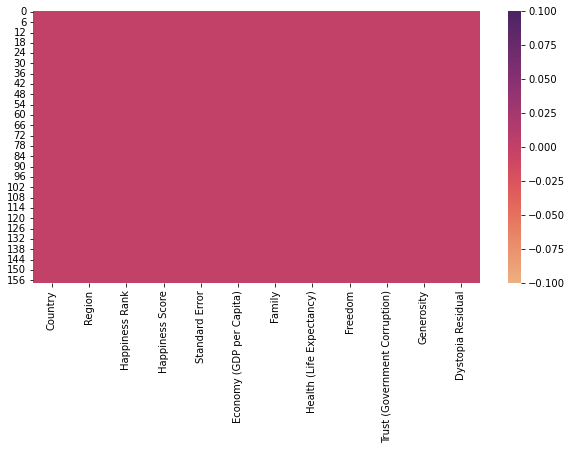

In [104]:
# Checking null values in heatmap

plt.figure(figsize=(10,5))
sns.heatmap(happy.isnull(),cmap=sns.color_palette("flare", as_cmap=True))

In [105]:
happy.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

Text(0, 0.5, 'Count')

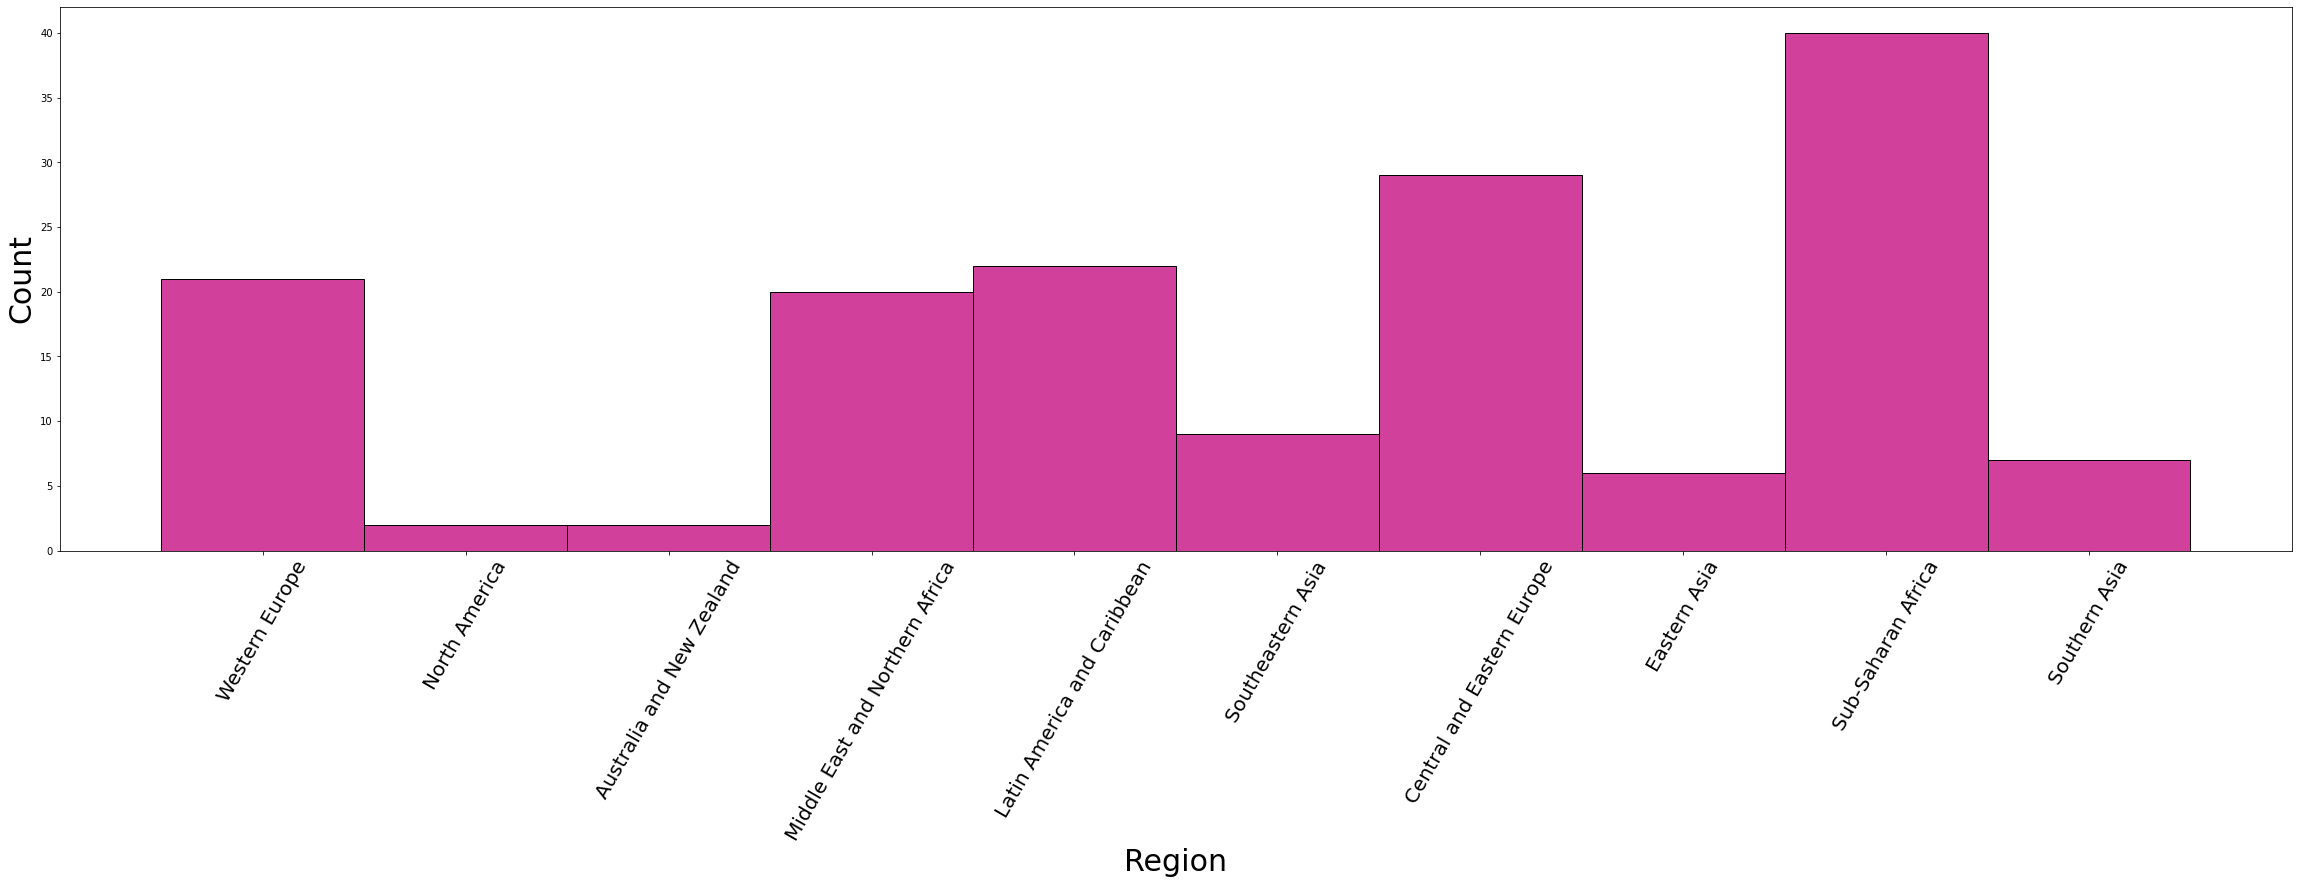

In [106]:
# Visualizing the data with histplot based on region

plt.figure(figsize=(40,10))
sns.histplot(happy, x = 'Region',color='#c20078')
plt.xticks(fontsize=20,rotation=60)
plt.xlabel('Region',fontsize=30)
plt.ylabel('Count',fontsize=30)

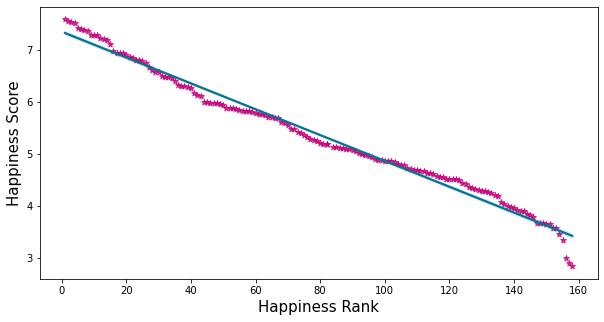

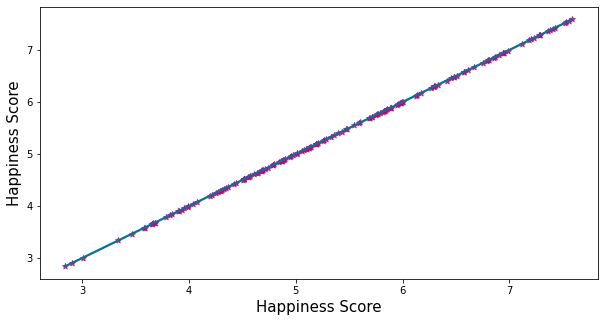

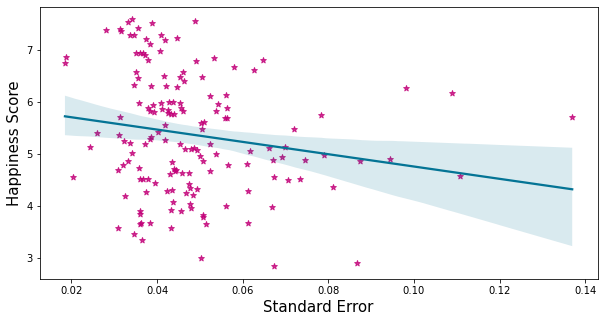

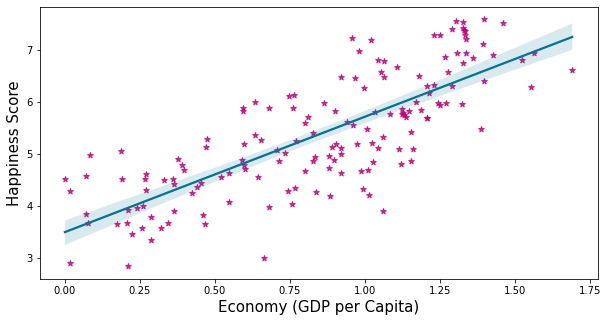

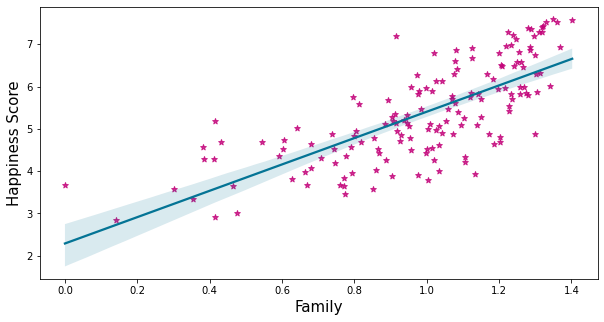

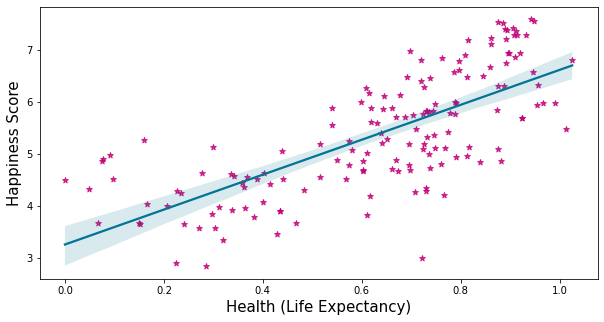

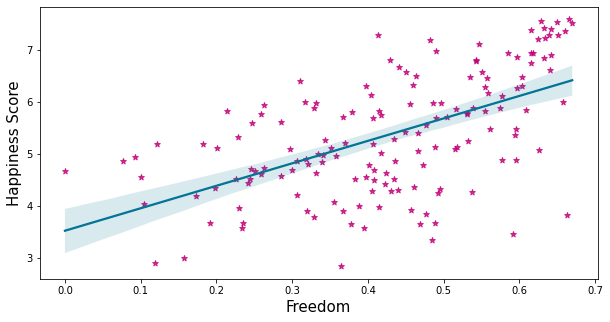

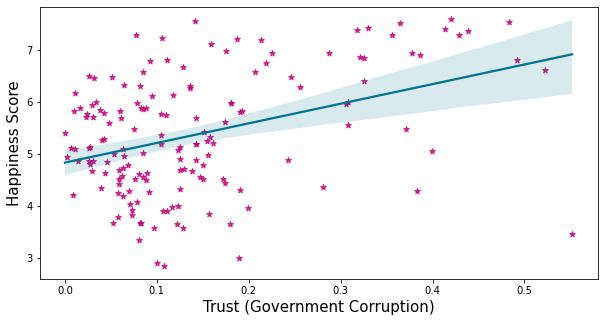

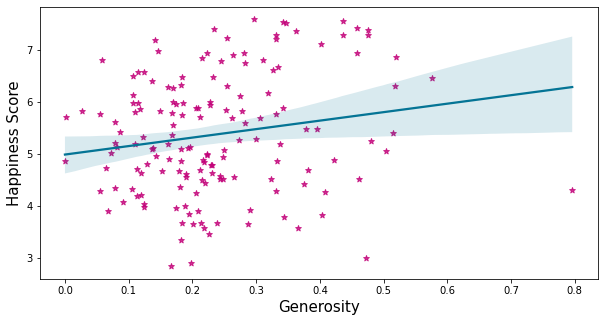

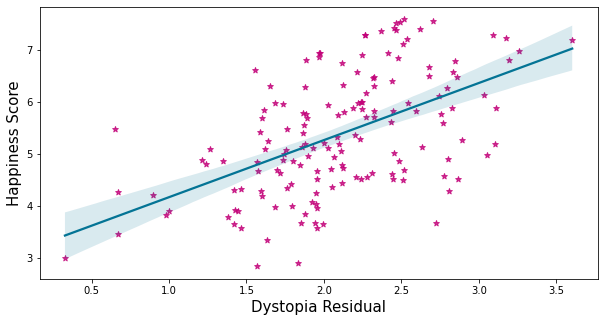

In [107]:
# Visualizing the data with regplot based on happiness score


for i in happy.columns[2:12]:
    plt.figure(figsize=(10,5))
    sns.regplot(x=happy[i],y=happy['Happiness Score'],scatter_kws={"color":"#c20078"},
            line_kws={"color":"#047495"},marker='*')
    plt.xlabel(i,fontsize=15)
    plt.ylabel('Happiness Score',fontsize=15)

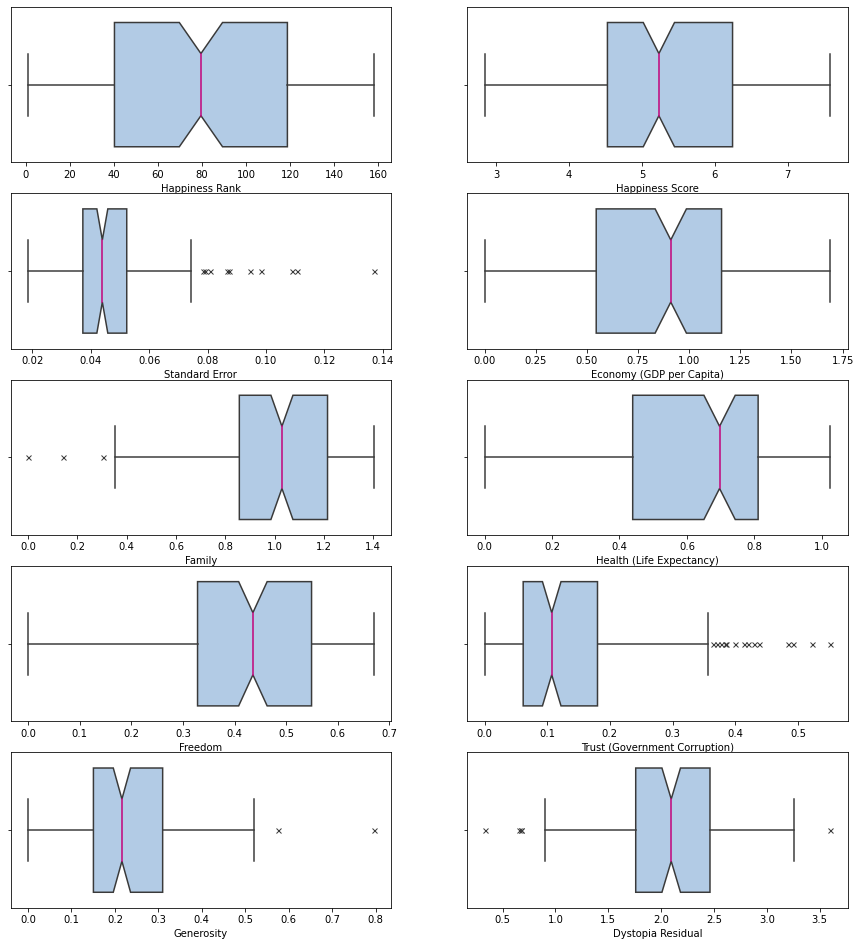

In [108]:
# Visualizing the dataset with boxplot to check Outliers

plt.figure(figsize=(15,20))
st = 1
for i in happy.columns[2:12]:
    if st <=12:
        sub = plt.subplot(6,2,st)
        sns.boxplot(happy[i],color='#c20078',notch=True,boxprops={"facecolor": (.4, .6, .8, .5)},
                    medianprops={"color": "#c20078"},flierprops={"marker": "x"})
        plt.xlabel(i,fontsize=10)
    st+=1
plt.show()

Analysis:
    
Sub-Saharan Africa region countries are more in the list of 158 countries followed by Central and Eastern Europe

When Standard error increases Happiness score decreases 

When Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption),
Generosity, Dystopia Residual increase the Happiness score also increases
       
We can see outliers present in the dataset  Standard error, Family, Trust (Government Corruption),Generosity, 
Dystopia Residual

# Data Feature Selection and Engineering

In [110]:
# Applying Label encoder to categorical columns Country and Region for analysis 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in happy.columns:
    if(happy[i].dtypes=='object'):
        happy[i]=le.fit_transform(happy[i].values.reshape(-1,1))
happy

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [111]:
# Checking the datset with describe function


happy.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Analysis:
    
Outliers are present in the dataset as we can see in few columns 75% to max got huge differences

In [112]:
# Checking the correlation of the dataset

happy.corr()['Happiness Score'].sort_values()

Happiness Rank                  -0.992105
Standard Error                  -0.177254
Region                          -0.176791
Country                          0.083380
Generosity                       0.180319
Trust (Government Corruption)    0.395199
Dystopia Residual                0.530474
Freedom                          0.568211
Health (Life Expectancy)         0.724200
Family                           0.740605
Economy (GDP per Capita)         0.780966
Happiness Score                  1.000000
Name: Happiness Score, dtype: float64

<AxesSubplot:>

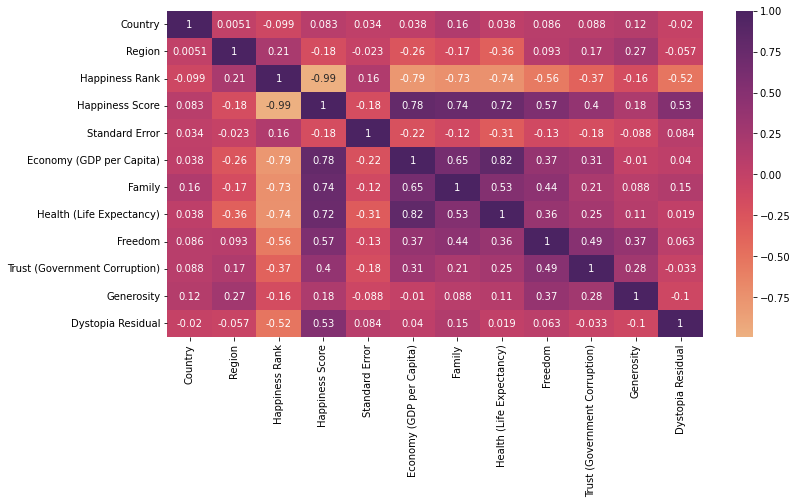

In [113]:
# Visualizing correlation by heatmap

plt.figure(figsize=(12,6))
sns.heatmap(happy.corr(),annot=True,cmap=sns.color_palette("flare", as_cmap=True))

Analysis:

Below are the features which are negatively coerrelated with Happiness scores

Happiness Rank                
Standard Error                  
Region  

Below are the features which are positively coerrelated with Happiness scores

Country                          
Generosity                       
Trust (Government Corruption)    
Dystopia Residual                
Freedom                          
Health (Life Expectancy)        
Family                        
Economy (GDP per Capita)

In [114]:
happy.skew().sort_values()

Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Economy (GDP per Capita)        -0.317575
Dystopia Residual               -0.238911
Region                          -0.116119
Country                          0.000000
Happiness Rank                   0.000418
Happiness Score                  0.097769
Generosity                       1.001961
Trust (Government Corruption)    1.385463
Standard Error                   1.983439
dtype: float64

In [115]:
# Removing outliers with Z score

from scipy.stats import zscore

happy_z = happy[happy.columns]

z = np.abs(zscore(happy_z))
threshold = 3
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([ 9,  4,  4,  4, 10,  6,  9, 11,  6], dtype=int64))


In [116]:
happy_new = happy_z[(z<3).all(axis=1)]

In [117]:
happy.shape

(158, 12)

In [118]:
happy_new.shape

(149, 12)

In [119]:
# Checking the data loss

data_loss = (158-149)/158*100
data_loss

5.69620253164557

Analysis:
    
We got 5.9% of dataloss after removing outliers.

In [123]:
# Checking VIF inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

x = happy_new.drop(['Happiness Score'],axis=1)

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
print(vif)


    VIF Factor                       Features
0     4.080724                        Country
1     5.541325                         Region
2     5.732283                 Happiness Rank
3    13.745754                 Standard Error
4    28.217616       Economy (GDP per Capita)
5    32.447513                         Family
6    28.154014       Health (Life Expectancy)
7    16.980265                        Freedom
8     3.890405  Trust (Government Corruption)
9     7.046492                     Generosity
10   14.825046              Dystopia Residual


In [124]:
y = happy_new['Happiness Score']
y.shape

(149,)

In [158]:
happy_new['Happiness Score']

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
5      7.406
6      7.378
7      7.364
8      7.286
9      7.284
10     7.278
11     7.226
12     7.200
13     7.187
14     7.119
15     6.983
16     6.946
17     6.940
18     6.937
19     6.901
20     6.867
21     6.853
22     6.810
23     6.798
24     6.786
25     6.750
26     6.670
28     6.575
29     6.574
30     6.505
31     6.485
32     6.477
33     6.455
34     6.411
35     6.329
36     6.302
37     6.298
38     6.295
39     6.269
41     6.130
42     6.123
43     6.003
44     5.995
45     5.987
46     5.984
47     5.975
48     5.960
49     5.948
50     5.890
51     5.889
52     5.878
53     5.855
54     5.848
55     5.833
56     5.828
57     5.824
58     5.813
59     5.791
60     5.770
61     5.759
62     5.754
63     5.716
65     5.695
66     5.689
67     5.605
68     5.589
69     5.548
70     5.477
71     5.474
72     5.429
73     5.399
74     5.360
75     5.332
76     5.286
77     5.268
78     5.253
79     5.212

# Model Evaluation

We can drop columns Country, Region and Happiness Rank, as these columns doesn't contribute to happiness score.

So we can better drop these columns to proceed for Model evaluation 

In [125]:
x1 = x.drop(columns=['Country','Region','Happiness Rank'],axis=1)
x1

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
150,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [126]:
x1.shape

(149, 8)

Finding best Random state and R2_score

In [127]:
# Importing required Libraries

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [128]:
maxAcc = 0
maxRS = 0

for i in range(1,200):
    x1_train,x1_test,y_train,y_test = train_test_split(x1,y,test_size=.30,random_state=i)
    rf = RandomForestRegressor()
    rf.fit(x1_train,y_train)
    predrf = rf.predict(x1_test)
    acc = r2_score(y_test,predrf)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i
print("Max r2 score is ", maxAcc*100, "on Random state", maxRS)
    

Max r2 score is  95.89806746757972 on Random state 114


Based on Model evaluation we found the best R2 score is 95%  with Random state 114

# Creating train_test_Split

In [129]:
x1_train,x1_test,y_train,y_test = train_test_split(x1,y,test_size=.30, random_state=114)

# Regularization with Lasso and Ridge

In [130]:
from sklearn.linear_model import Lasso,Ridge

In [138]:
ls = Lasso(alpha = 0.0001)
ls.fit(x1_train,y_train)
ls.score(x1_train,y_train)

0.9999988630221377

In [140]:
rd = Ridge(alpha = 0.0001) 
rd.fit(x1_train,y_train)
rd.score(x1_train,y_train)

0.999999937220785

# Model Selection

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

LR = LinearRegression()
RFR = RandomForestRegressor()
svr = SVR()
DTR = DecisionTreeRegressor()
GBR = GradientBoostingRegressor()
KNR = KNeighborsRegressor()
BR = BaggingRegressor()
SR = SGDRegressor()
ABR = AdaBoostRegressor()
ETR = ExtraTreesRegressor()

Model = [LR,RFR,svr,DTR,GBR,KNR,BR,SR,ABR,ETR]

for m in Model:
    m.fit(x1_train,y_train)
    m.score(x1_train,y_train)
    predmod = m.predict(x1_test)
    score = r2_score(y_test,predmod)
    print("R2_score of", m,"is:",score*100)
    print("Mean absolute error: ", mean_absolute_error(y_test,predmod))
    print("Mean squared error: ", mean_squared_error(y_test,predmod))
    print("Root Mean absolute error: ",np.sqrt(mean_squared_error(y_test,predmod)))
    print('*************************************************************')

R2_score of LinearRegression() is: 99.99999259154352
Mean absolute error:  0.00025748024145403215
Mean squared error:  8.921435820495e-08
Root Mean absolute error:  0.0002986877269071329
*************************************************************
R2_score of RandomForestRegressor() is: 96.08008977297018
Mean absolute error:  0.16981355555555547
Mean squared error:  0.047204471780000014
Root Mean absolute error:  0.2172659010981705
*************************************************************
R2_score of SVR() is: 99.56307594962581
Mean absolute error:  0.058829093476324375
Mean squared error:  0.005261541160732007
Root Mean absolute error:  0.07253648158500664
*************************************************************
R2_score of DecisionTreeRegressor() is: 83.56788867467635
Mean absolute error:  0.3516222222222222
Mean squared error:  0.19787931111111115
Root Mean absolute error:  0.44483627450008073
*************************************************************
R2_score of Gradie

# Cross validation 

In [144]:
from sklearn.model_selection import cross_val_score

cr1 = cross_val_score(LR,x1,y, cv=10)
cr2 = cross_val_score(RFR,x1,y, cv=10)
cr3 = cross_val_score(svr,x1,y, cv=10)
cr4 = cross_val_score(DTR,x1,y, cv=10)
cr5 = cross_val_score(GBR,x1,y, cv=10)
cr6 = cross_val_score(KNR,x1,y, cv=10)
cr7 = cross_val_score(BR,x1,y, cv=10)
cr8 = cross_val_score(SR,x1,y, cv=10)
cr9 = cross_val_score(ABR,x1,y, cv=10)
cr10 = cross_val_score(ETR,x1,y, cv=10)

print('CV score of Linear Regression:',cr1.mean()*100)
print('CV score of Random Forest Regressor:',cr2.mean()*100)
print('CV score of Support Vector Regressor:',cr3.mean()*100)
print('CV score of Decision Tree Regressor:',cr4.mean()*100)
print('CV score of Gradient Boost Regressor:',cr5.mean()*100)
print('CV score of K Neighbors Regressor:',cr6.mean()*100)
print('CV score of Bagging Regressor:',cr7.mean()*100)
print('CV score of SGDRegressor:',cr8.mean()*100)
print('CV score of AdaBoostRegressor:',cr9.mean()*100)
print('CV score of ExtraTrees Regressor:',cr10.mean()*100)

CV score of Linear Regression: 99.9990077544901
CV score of Random Forest Regressor: -938.1386411699752
CV score of Support Vector Regressor: -23.36085416964718
CV score of Decision Tree Regressor: -2816.63139370565
CV score of Gradient Boost Regressor: -814.988922492773
CV score of K Neighbors Regressor: -753.3730206837282
CV score of Bagging Regressor: -1374.1143209049383
CV score of SGDRegressor: -394.45626480029205
CV score of AdaBoostRegressor: -1668.9167590390457
CV score of ExtraTrees Regressor: -659.7679401019908


# Final Model

In [152]:
Final_Model = LinearRegression()
                                       
Final_Model.fit(x1_train,y_train)
pred = Final_Model.predict(x1_test)
scores = r2_score(y_test,pred)
print("R2 Score:",scores*100)
print("Mean absolute error: ", mean_absolute_error(y_test,pred))
print("Mean squared error: ", mean_squared_error(y_test,pred))
print("Root Mean absolute error: ",np.sqrt(mean_squared_error(y_test,pred)))

R2 Score: 99.99999259154352
Mean absolute error:  0.00025748024145403215
Mean squared error:  8.921435820495e-08
Root Mean absolute error:  0.0002986877269071329


Our Final Model is Linear Regression with 99.9% accuracy, based on R2 score and Cross validation.

#    Saving the model

In [155]:
import joblib
joblib.dump(Final_Model,'Happiness_Prediction.pkl')

['Happiness_Prediction.pkl']

# Predicting the Model

In [165]:
Model = joblib.load('Happiness_Prediction.pkl')

Prediction = Model.predict(x1_test)
pd.set_option('display.max_rows',None)
pd.DataFrame([Model.predict(x1_test)[:],y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,4.076804,4.077
1,5.286407,5.286
2,5.332510,5.332
3,5.123106,5.123
4,5.987148,5.987
5,4.369152,4.369
6,5.013182,5.013
7,4.897399,4.898
8,7.285995,7.286
9,5.975308,5.975


# Conclusion

Final Model Linear Refression is prediciting the test result accurately with 99.9% and both Predicted and Original
results are same.

We can use this Model for future prediction of Happiness Score for the countries and rank them accordingly